In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cust = pd.read_excel("/content/drive/MyDrive/dsba_mbad_6201_bia/logit2/CSM.xls")
print(cust)

     Ratings  Genre      Gross       Budget  Screens  Sequel  Sentiment  \
0        6.3      8       9130    4000000.0       45       1          0   
1        7.1      1  192000000   50000000.0     3306       2          2   
2        6.2      1   30700000   28000000.0     2872       1          0   
3        6.3      1  106000000  110000000.0     3470       2          0   
4        4.7      8   17300000    3500000.0     2310       2          0   
..       ...    ...        ...          ...      ...     ...        ...   
227      5.5     15   21000000   37000000.0     2815       1         13   
228      5.4      8   10200000   35000000.0     2777       1          7   
229      5.4      1   12300000    3000000.0      478       1         10   
230      4.4     15   22600000     100000.0     2720       1         -5   
231      5.5      8   12240000    1200000.0       78       2          1   

       Views  Likes  Dislikes  Comments  
0    3280543   4632       425       636  
1     583289   

In [3]:
cust.describe()

,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments
count,232.000000,232.000000,2.320000e+02,2.320000e+02,232.000000,232.000000,232.000000,2.320000e+02,232.000000,232.000000,232.000000
mean,6.437500,5.370690,6.782540e+07,4.759999e+07,2136.392241,1.362069,2.801724,3.697136e+06,12678.948276,676.271552,1823.004310
std,0.988557,4.136272,8.878593e+07,5.417026e+07,1471.597161,0.966061,6.982625,4.507690e+06,28774.603213,1241.956329,3563.539321
min,3.100000,1.000000,2.470000e+03,7.000000e+04,2.000000,1.000000,-38.000000,6.980000e+02,1.000000,0.000000,0.000000
25%,5.800000,1.000000,1.035000e+07,8.983195e+06,415.750000,1.000000,0.000000,6.049710e+05,1681.250000,104.750000,249.250000
50%,6.500000,3.000000,3.690000e+07,2.750000e+07,2738.500000,1.000000,0.000000,2.401178e+06,6024.500000,340.500000,841.500000
75%,7.100000,8.000000,8.932500e+07,6.500000e+07,3323.500000,1.000000,5.250000,5.217030e+06,15195.750000,694.250000,2120.500000
max,8.700000,15.000000,6.430000e+08,2.500000e+08,4324.000000,7.000000,29.000000,3.262678e+07,370552.000000,13960.000000,38363.000000


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ratings    232 non-null    float64
 1   Genre      232 non-null    int64  
 2   Gross      232 non-null    int64  
 3   Budget     232 non-null    float64
 4   Screens    232 non-null    int64  
 5   Sequel     232 non-null    int64  
 6   Sentiment  232 non-null    int64  
 7   Views      232 non-null    int64  
 8   Likes      232 non-null    int64  
 9   Dislikes   232 non-null    int64  
 10  Comments   232 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 20.1 KB


In [13]:
# creating a dummy variable that equals 1 when the movie rating is greater than 6.0, otherwise it equals 0
# Dummy variable link - https://stackoverflow.com/questions/11587782/creating-dummy-variables-in-pandas-for-python
cust['hits'] = np.where(cust['Ratings'] > 6.0, 1, 0)

In [12]:
print(cust)

     Ratings  Genre      Gross       Budget  Screens  Sequel  Sentiment  \
0        6.3      8       9130    4000000.0       45       1          0   
1        7.1      1  192000000   50000000.0     3306       2          2   
2        6.2      1   30700000   28000000.0     2872       1          0   
3        6.3      1  106000000  110000000.0     3470       2          0   
4        4.7      8   17300000    3500000.0     2310       2          0   
..       ...    ...        ...          ...      ...     ...        ...   
227      5.5     15   21000000   37000000.0     2815       1         13   
228      5.4      8   10200000   35000000.0     2777       1          7   
229      5.4      1   12300000    3000000.0      478       1         10   
230      4.4     15   22600000     100000.0     2720       1         -5   
231      5.5      8   12240000    1200000.0       78       2          1   

       Views  Likes  Dislikes  Comments  hits  
0    3280543   4632       425       636     1  
1  

In [14]:
# Check multicollinearity with VIF
# https://www.statsmodels.org/stable/index.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
x = cust[['Likes', 'Comments', 'Screens']]
x

,Likes,Comments,Screens
0,4632,636,45
1,3465,186,3306
2,328,47,2872
3,2429,590,3470
4,12163,1082,2310
...,...,...,...
227,18803,2290,2815
228,6823,409,2777
229,400,201,478
230,2841,606,2720


In [29]:
y = cust['hits']
y

0      1
1      1
2      1
3      1
4      0
      ..
227    0
228    0
229    0
230    0
231    0
Name: hits, Length: 232, dtype: int64

In [18]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [23]:
# calculating VIF for each feature
# Potential issues but not above 10 so good for now
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

    feature       VIF
0     Likes  7.556981
1  Comments  8.041671
2   Screens  1.289109


In [24]:
x.corr()

,Likes,Comments,Screens
Likes,1.000000,0.917389,0.152588
Comments,0.917389,1.000000,0.184133
Screens,0.152588,0.184133,1.000000


In [26]:
import statsmodels.api as sm
log_reg = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.616459
         Iterations 5


In [27]:
# Logistic Regression Model Results
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                   hits   No. Observations:                  232
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Dec 2022   Pseudo R-squ.:                -0.02561
Time:                        20:33:34   Log-Likelihood:                -143.02
converged:                       True   LL-Null:                       -139.45
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Likes       4.075e-05   1.93e-05      2.110      0.035    2.91e-06    7.86e-05
Comments      -0.0003      0.000     -2.264      0.024      -0.001   -3.88e-05
Screens        0.0003   6.92e-05      4.391      0.0

In [30]:
# Model valuation: confusion matrix
from sklearn.metrics import confusion_matrix
# Model prediction based on the valuation dataset
prediction_prob = log_reg.predict(x)
prediction = list(map(round, prediction_prob))
confusion_matrix(y,prediction)

array([[  8,  59],
       [ 16, 149]])

In [31]:
# Model valuation: ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [32]:
# calculate AUC scores
lr_auc = roc_auc_score(y, prediction_prob)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.557


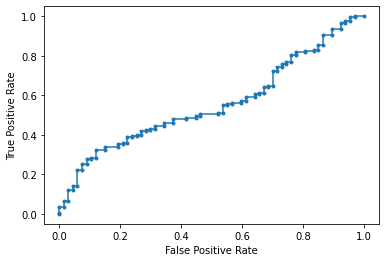

In [34]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y, prediction_prob)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()